In [100]:
import numpy as np
from typing import List, Union
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from importlib import reload
from tqdm.notebook import tqdm
import itertools

from src.model import Model
from src.modules import *

## Data

In [2]:
X, Y = load_iris(return_X_y=True)
X.shape, Y.shape

((150, 4), (150,))

In [3]:
labels = np.eye(3)[Y]
labels.shape

(150, 3)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

## Exps

In [102]:
def experiment(model, lr, epochs=2000):
    train_losses = []
    test_losses = []

    train_accs = []
    test_accs = []
    print('Experiment lr:', lr)
    print('Experiment model:', model)

    for epoch in tqdm(range(epochs)):
        loss, acc = model.fit(X_train, y_train, lr=lr)
        train_losses += [loss]
        train_accs += [acc]

        preds = model(X_test.T)
        loss, acc = model.calc_metrics(y_test, preds)
        test_losses += [loss]
        test_accs += [acc]
        
    print('Final train loss: {:.2f}'.format(train_losses[-1]), ' -  Final test loss: {:.2f}'.format(test_losses[-1]))
    print('Final train acc: {:.2f}'.format(train_accs[-1]), '  -  Final test acc: {:.2f}'.format(test_accs[-1]))
    plt.figure(figsize=(18,6))
    plt.subplot(1,2,1)
    plt.title('Loss')
    plt.plot(train_losses, label='train')
    plt.plot(test_losses, label='test')
    plt.legend()
    plt.subplot(1,2,2)
    plt.title('Accuracy')
    plt.plot(train_accs, label='train')
    plt.plot(test_accs, label='test')
    plt.legend()
    plt.show()
    return {'lr' : lr, 'test_loss': test_losses[-1], 'test_acc': test_accs[-1], 'train_loss' : train_losses[-1], 'train_acc' : train_accs[-1]}

Experiment lr: 0.1
Experiment model: Model(
  Layer(W=(3, 4), B=(3, 1), act=Linear)
)


  0%|          | 0/2000 [00:00<?, ?it/s]

Final train loss: 0.10  -  Final test loss: 0.10
Final train acc: 0.97   -  Final test acc: 1.00


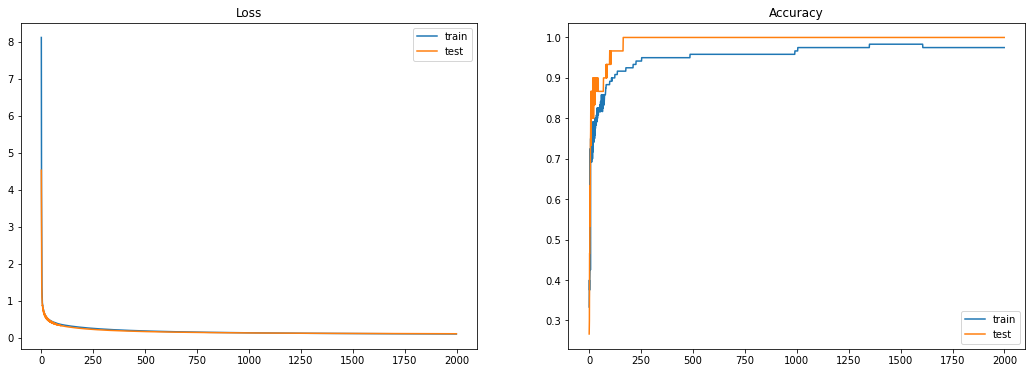

Experiment lr: 0.01
Experiment model: Model(
  Layer(W=(3, 4), B=(3, 1), act=Linear)
)


  0%|          | 0/2000 [00:00<?, ?it/s]

Final train loss: 0.09  -  Final test loss: 0.10
Final train acc: 0.97   -  Final test acc: 1.00


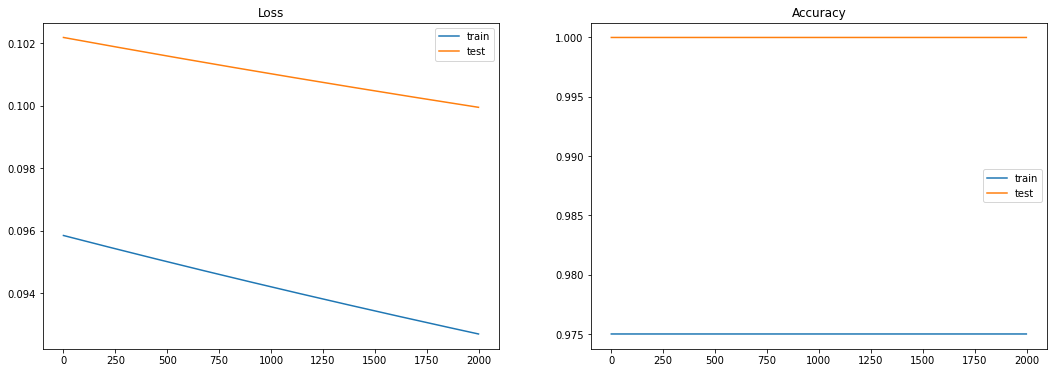

Experiment lr: 1.0
Experiment model: Model(
  Layer(W=(3, 4), B=(3, 1), act=Linear)
)


  0%|          | 0/2000 [00:00<?, ?it/s]

Final train loss: 0.07  -  Final test loss: 0.06
Final train acc: 0.96   -  Final test acc: 0.97


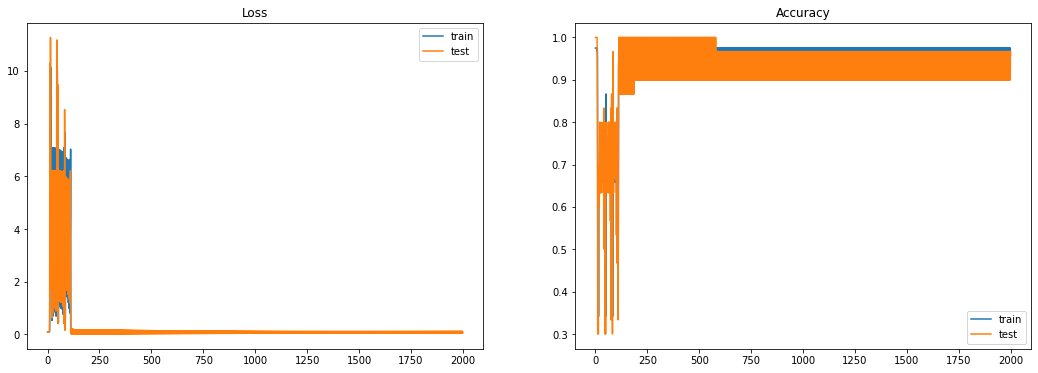

Experiment lr: 0.1
Experiment model: Model(
  Layer(W=(2, 4), B=(2, 1), act=ReLU)
  Layer(W=(3, 2), B=(3, 1), act=Linear)
)


  0%|          | 0/2000 [00:00<?, ?it/s]

Final train loss: 0.08  -  Final test loss: 0.11
Final train acc: 0.98   -  Final test acc: 0.93


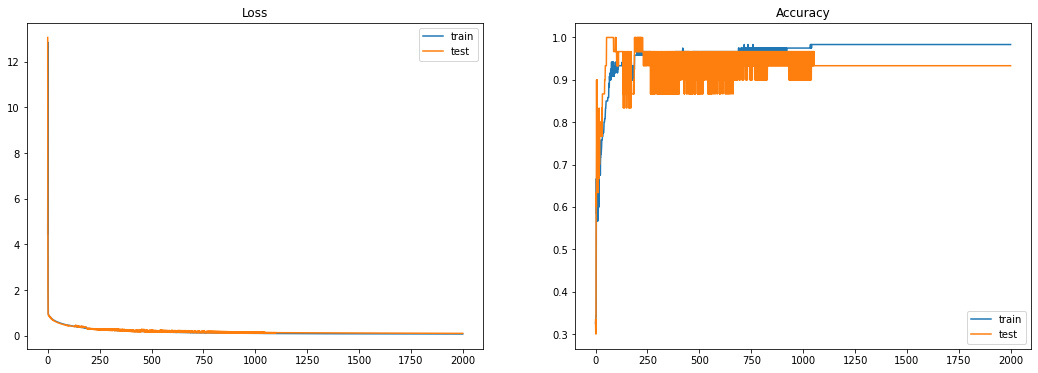

Experiment lr: 0.01
Experiment model: Model(
  Layer(W=(2, 4), B=(2, 1), act=ReLU)
  Layer(W=(3, 2), B=(3, 1), act=Linear)
)


  0%|          | 0/2000 [00:00<?, ?it/s]

Final train loss: 0.08  -  Final test loss: 0.11
Final train acc: 0.98   -  Final test acc: 0.93


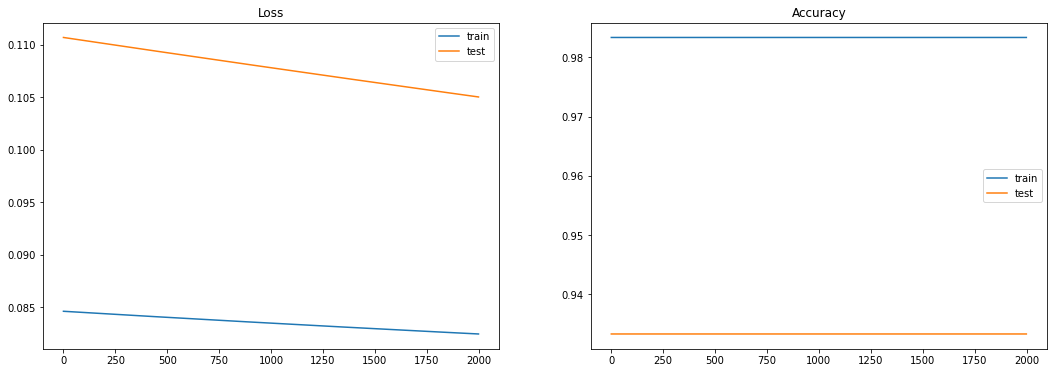

Experiment lr: 1.0
Experiment model: Model(
  Layer(W=(2, 4), B=(2, 1), act=ReLU)
  Layer(W=(3, 2), B=(3, 1), act=Linear)
)


  0%|          | 0/2000 [00:00<?, ?it/s]

Final train loss: 1.10  -  Final test loss: 1.10
Final train acc: 0.34   -  Final test acc: 0.30


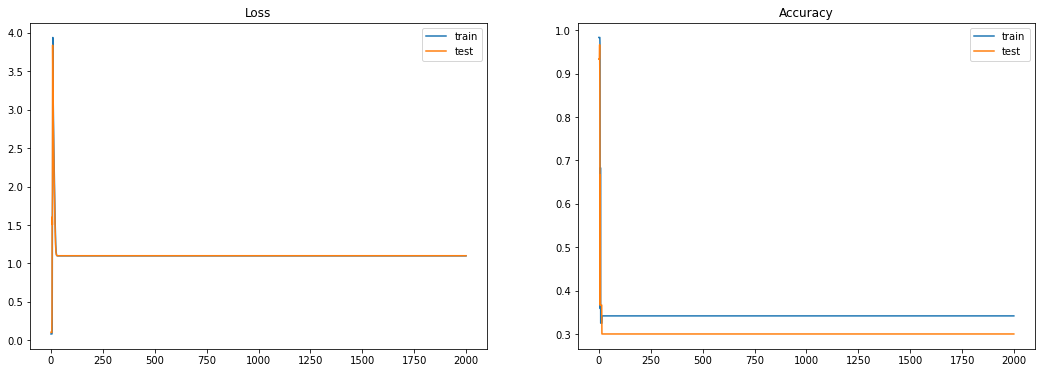

Experiment lr: 0.1
Experiment model: Model(
  Layer(W=(8, 4), B=(8, 1), act=ReLU)
  Layer(W=(3, 8), B=(3, 1), act=Linear)
)


  0%|          | 0/2000 [00:00<?, ?it/s]

Final train loss: 0.06  -  Final test loss: 0.07
Final train acc: 0.97   -  Final test acc: 1.00


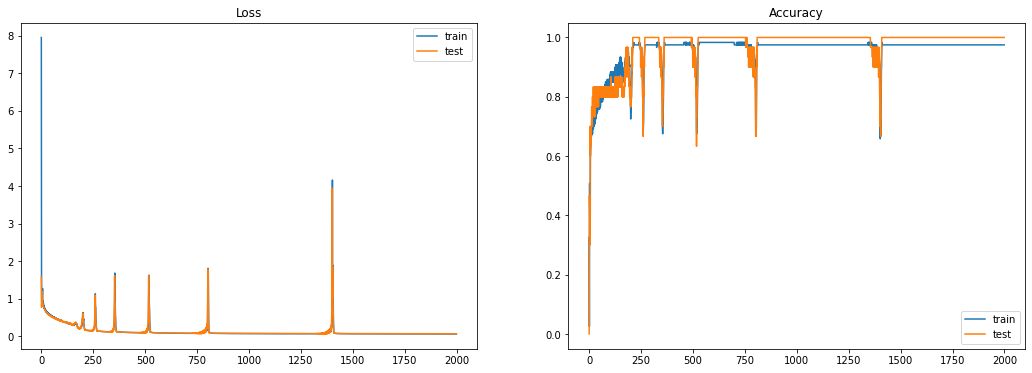

Experiment lr: 0.01
Experiment model: Model(
  Layer(W=(8, 4), B=(8, 1), act=ReLU)
  Layer(W=(3, 8), B=(3, 1), act=Linear)
)


  0%|          | 0/2000 [00:00<?, ?it/s]

Final train loss: 0.06  -  Final test loss: 0.07
Final train acc: 0.97   -  Final test acc: 1.00


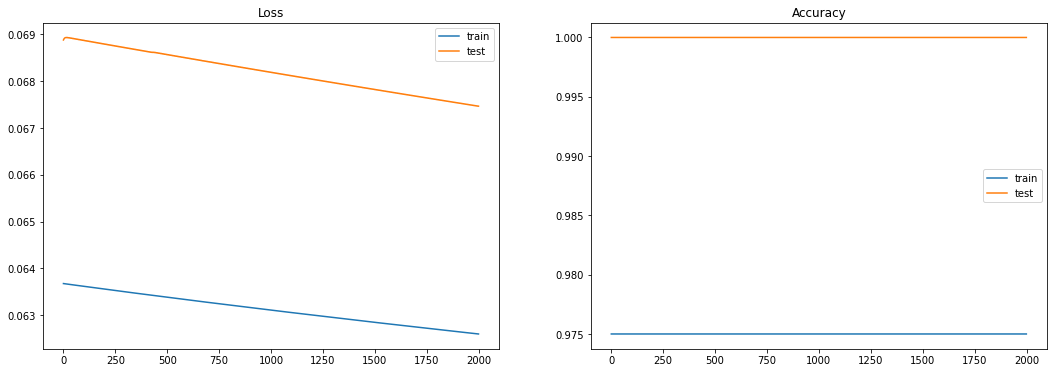

Experiment lr: 1.0
Experiment model: Model(
  Layer(W=(8, 4), B=(8, 1), act=ReLU)
  Layer(W=(3, 8), B=(3, 1), act=Linear)
)


  0%|          | 0/2000 [00:00<?, ?it/s]

Final train loss: 1.10  -  Final test loss: 1.10
Final train acc: 0.34   -  Final test acc: 0.30


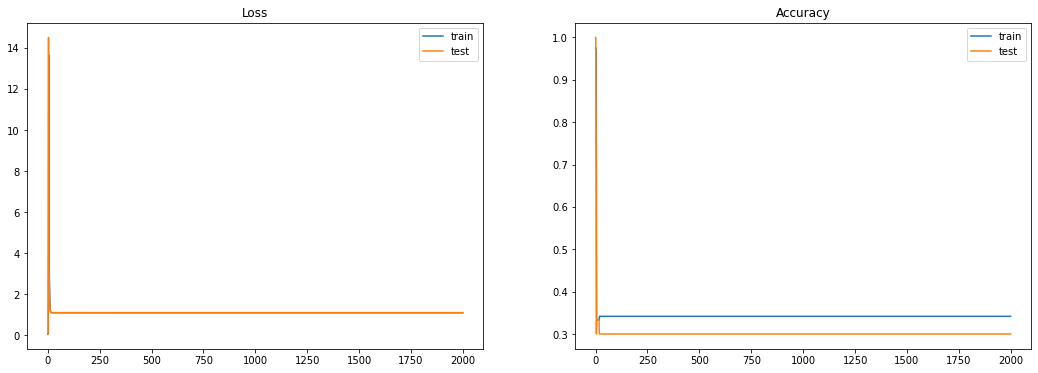

Experiment lr: 0.1
Experiment model: Model(
  Layer(W=(8, 4), B=(8, 1), act=Sigmoid)
  Layer(W=(3, 8), B=(3, 1), act=Linear)
)


  0%|          | 0/2000 [00:00<?, ?it/s]

Final train loss: 0.12  -  Final test loss: 0.20
Final train acc: 0.95   -  Final test acc: 0.87


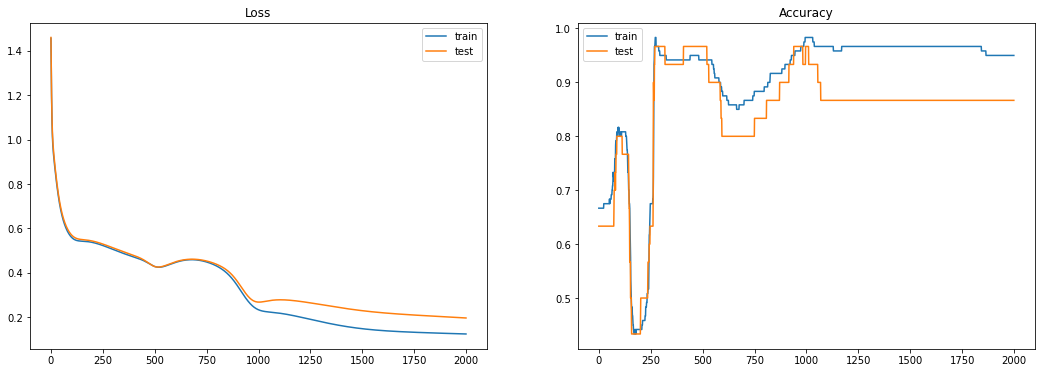

Experiment lr: 0.01
Experiment model: Model(
  Layer(W=(8, 4), B=(8, 1), act=Sigmoid)
  Layer(W=(3, 8), B=(3, 1), act=Linear)
)


  0%|          | 0/2000 [00:00<?, ?it/s]

Final train loss: 0.12  -  Final test loss: 0.19
Final train acc: 0.95   -  Final test acc: 0.87


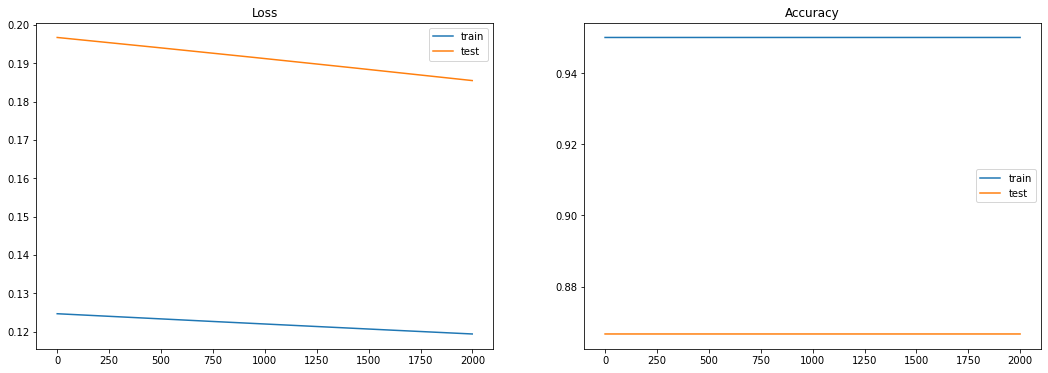

Experiment lr: 1.0
Experiment model: Model(
  Layer(W=(8, 4), B=(8, 1), act=Sigmoid)
  Layer(W=(3, 8), B=(3, 1), act=Linear)
)


  0%|          | 0/2000 [00:00<?, ?it/s]

Final train loss: 0.46  -  Final test loss: 0.47
Final train acc: 0.68   -  Final test acc: 0.63


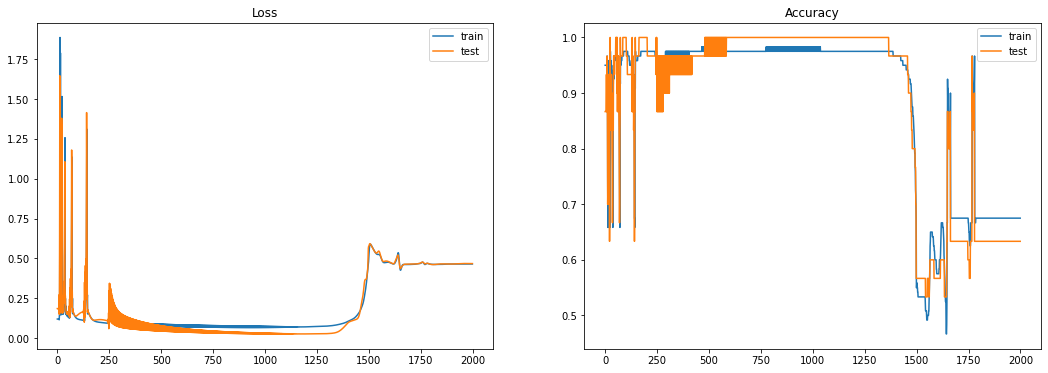

Experiment lr: 0.1
Experiment model: Model(
  Layer(W=(8, 4), B=(8, 1), act=TanH)
  Layer(W=(3, 8), B=(3, 1), act=Linear)
)


  0%|          | 0/2000 [00:00<?, ?it/s]

Final train loss: 0.06  -  Final test loss: 0.05
Final train acc: 0.97   -  Final test acc: 0.97


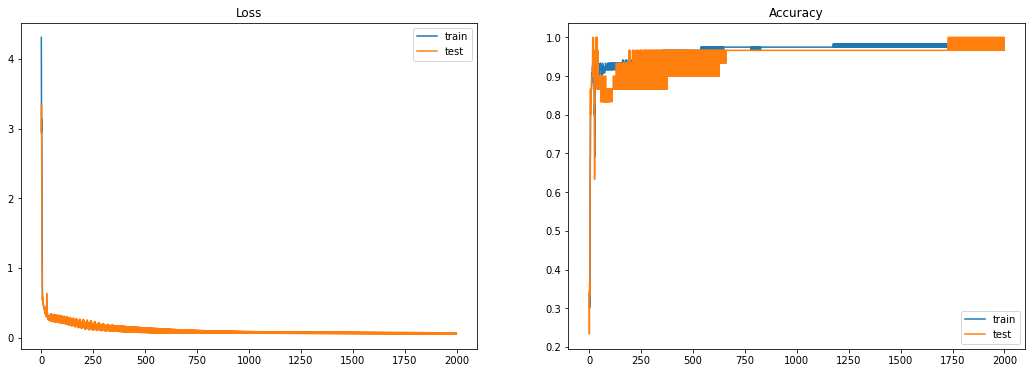

Experiment lr: 0.01
Experiment model: Model(
  Layer(W=(8, 4), B=(8, 1), act=TanH)
  Layer(W=(3, 8), B=(3, 1), act=Linear)
)


  0%|          | 0/2000 [00:00<?, ?it/s]

Final train loss: 0.06  -  Final test loss: 0.05
Final train acc: 0.98   -  Final test acc: 1.00


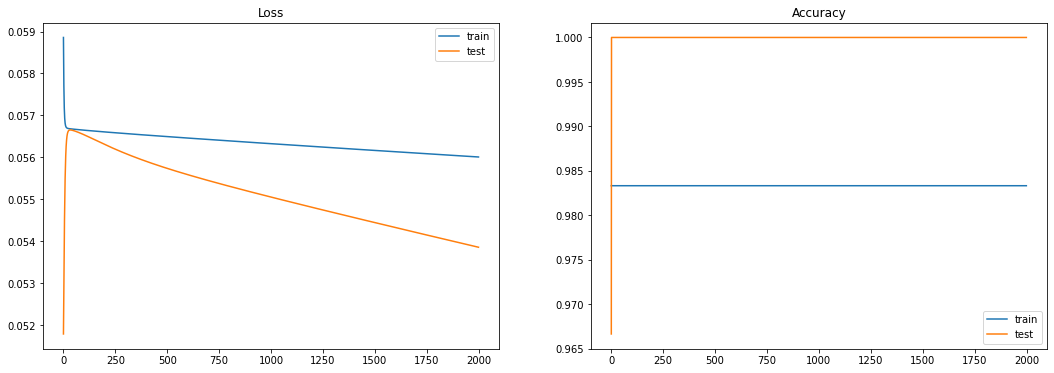

Experiment lr: 1.0
Experiment model: Model(
  Layer(W=(8, 4), B=(8, 1), act=TanH)
  Layer(W=(3, 8), B=(3, 1), act=Linear)
)


  0%|          | 0/2000 [00:00<?, ?it/s]

Final train loss: 0.04  -  Final test loss: 0.03
Final train acc: 0.98   -  Final test acc: 1.00


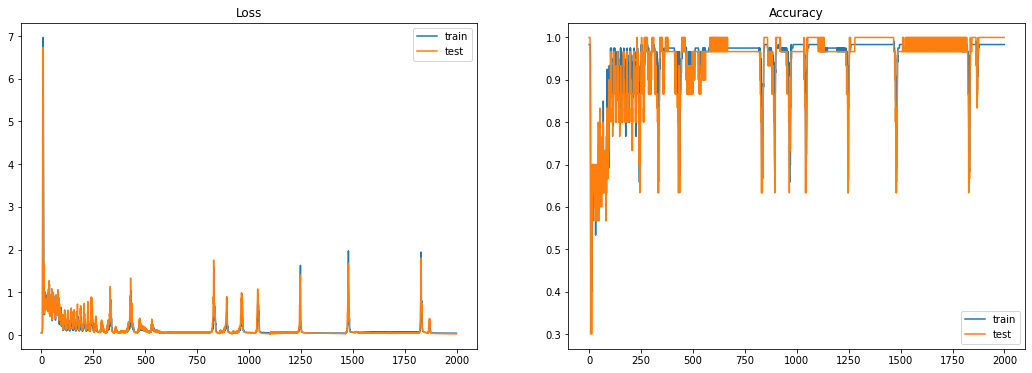

In [103]:
np.random.seed(0)
models = [
    Model(dims=[4,3], acts=[Linear()]),
    Model(dims=[4,2,3], acts=[ReLU(), Linear()]),
    Model(dims=[4,8,3], acts=[ReLU(), Linear()]),
    Model(dims=[4,8,3], acts=[Sigmoid(), Linear()]),
    Model(dims=[4,8,3], acts=[TanH(), Linear()]),
]
lrs = [0.1, 0.01, 1.]

df = pd.DataFrame()
for model, lr in itertools.product(models, lrs):
    row = experiment(model, lr)
    row['model'] = int(models.index(model))
    df = df.append(row, ignore_index=True)

In [98]:
df[['model', 'lr', 'test_loss', 'test_acc', 'train_loss', 'train_acc']]

,model,lr,test_loss,test_acc,train_loss,train_acc
0,0,0.10,0.102184,1.000000,0.095869,0.975000
1,0,0.01,0.099950,1.000000,0.092703,0.975000
2,0,1.00,0.060330,0.966667,0.073335,0.958333
3,1,0.10,0.110709,0.933333,0.084615,0.983333
4,1,0.01,0.105034,0.933333,0.082439,0.983333
5,1,1.00,1.100488,0.300000,1.098404,0.341667
6,2,0.10,0.068867,1.000000,0.063684,0.975000
7,2,0.01,0.067467,1.000000,0.062601,0.975000
8,2,1.00,1.100488,0.300000,1.098404,0.341667
9,3,0.10,0.196722,0.866667,0.124688,0.950000


In [104]:
models

[Model(
   Layer(W=(3, 4), B=(3, 1), act=Linear)
 ),
 Model(
   Layer(W=(2, 4), B=(2, 1), act=ReLU)
   Layer(W=(3, 2), B=(3, 1), act=Linear)
 ),
 Model(
   Layer(W=(8, 4), B=(8, 1), act=ReLU)
   Layer(W=(3, 8), B=(3, 1), act=Linear)
 ),
 Model(
   Layer(W=(8, 4), B=(8, 1), act=Sigmoid)
   Layer(W=(3, 8), B=(3, 1), act=Linear)
 ),
 Model(
   Layer(W=(8, 4), B=(8, 1), act=TanH)
   Layer(W=(3, 8), B=(3, 1), act=Linear)
 )]